<div style="padding: 115px;color:white;margin:10;border-radius:8px;overflow:hidden;background-image: url(https://www.cimbbank.com.ph/en/financial-literacy-articles/financial-essentials/4-things-you-can-do-with-a-personal-loan/_jcr_content/root/responsivegrid_58989/responsivegrid_470203168/responsivegrid/responsivegrid/image.img.jpeg/1641542565680/loan.jpeg);background-position: 9% 25%"></div>

<p style="padding-bottom: 10px;
          margin-bottom: 10px;
          font-size: 50px;
          font-weight: bold;
          color: black; 
          text-align: left;
          font-family: Poppins"><b>Loan Approval | Weight of Evidence (WoE) &amp; Information Value (IV)</b>
<p style="font-size: 22px; color: gray; text-align: left;">Let's delve deeper into two important techniques for feature selection and handling of <i>noisy</i> data</p>
<hr style="height:2px;border-width:0;color:gray;background-color:gray;box-shadow: 0px 2.5px 5px rgba(0, 0, 0, 0.2);">

<h3 style="border-bottom: 1px solid #ccc;
            padding-bottom: 10px;
            margin-bottom: 10px;
            font-size: 16px;
            font-weight: bold;
            color: black;">Table of Contents</h3>
    
- [Introduction](#intro)<br><br>
- [Exploratory Data Analysis (EDA)](#eda)<br><br>
- [Weight of Evidence & Information Value](#woe_and_iv)<br><br>
- [Modeling](#model)<br><br>

<h1 id = 'intro' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Introduction</h1>

<span style="font-size: 20px">The <i><b>Weight of Evidence (WoE)</b></i> and the <i><b>Information Value (IV)</b></i> are two of the most widely used tools in <mark><b>Finance</b></mark> and <mark><b>credit risk analysis</b></mark>. Not only these tools are extremely relevant for the measurement of predictive power in $Independent$ $Variables$, but also extremely effective in handling outliers, missing values, and categorical data transformation. <br><br>
In this notebook, we will explore the practical applications of both WoE and IV by utilizing the <a href="https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset\">Loan-Approval-Prediction-Dataset</a>. Our aim is to demonstrate how these techniques can be used to enhance the predictive accuracy in many binary classification tasks, such as loan approval prediction. <br><br>
The dataset we have at hands consists of the following attributes:
</span>

<table style="font-family: Arial, sans-serif; font-size: 16px;">
  <tr>
    <th><b>Attribute</b></th>
    <th><b>Description</b></th>
  </tr>
  <tr>
    <td><b>loan_id</b></td>
    <td>The unique identification number of each sample.</td>
  </tr>
  <tr>
    <td><b>no_of_dependents</b></td>
    <td>The number of dependents of the applicant.</td>
  </tr>
  <tr>
    <td><b>education</b></td>
    <td>The edducation level of the applicant, either <b>Graduate</b> or <b>Not Graduate</b>.</td>
  </tr>
  <tr>
      <td><b>self_employed</b></td>
      <td>Either if the applicant is self employed or not.</td>
    </tr>
  <tr>
      <td><b>income_annum</b></td>
      <td>The annual income of the applicant.</td>
    </tr>
  <tr>
      <td><b>loan_amount</b></td>
      <td>The total amount requested for the loan.</td>
    </tr>
  <tr>
      <td><b>loan_term</b></td>
      <td>The duration, in years, within which the loan must be repaid.</td>
    </tr>
  <tr>
      <td><b>cibil_score</b></td>
      <td>Credit score of the applicant.</td>
    </tr>
  <tr>
      <td><b>residential_assets_value</b></td>
      <td>The total value of the applicant's residential assets.</td>
    </tr>
  <tr>
      <td><b>commercial_assets_value</b></td>
      <td>The total value of the applicant's commercial assets.</td>
    </tr>
 <tr>
      <td><b>luxury_assets_value</b></td>
      <td>The total value of the applicant's luxury assets.</td>
    </tr>
 <tr>
      <td><b>bank_asset_value</b></td>
      <td>The total value of the applicant's bank assets.</td>
    </tr>
 <tr>
      <td><b>loan_status</b></td>
      <td>Target variable. Describes whether the loan was approved or not.</td>
    </tr>
</table>

<span style="font-size: 20px">Let's start by importing all the necessary libraries and defining some helpful functions.
</span>

In [26]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np

# Financial Data Analysis
import yfinance as yf
import ta
import quantstats as qs

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson
import math

# Feature Selection
from sklearn.feature_selection import RFECV

# Machine Learning Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection for Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split,TimeSeriesSplit

# Machine Learning metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    cohen_kappa_score,
    make_scorer,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor
from sklearn.ensemble import (
    HistGradientBoostingRegressor, StackingRegressor, 
    AdaBoostRegressor, RandomForestRegressor, 
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
    )
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# ML classifiers
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier, 
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier
    )
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Clustering algorithm
from sklearn.cluster import KMeans

# Fine-tuning 
import optuna

# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [27]:
seed = 123 # Defining seed
seaborn = 'seaborn' # Defining Plotly Template

In [28]:
def dataframe_description(df):
    """
    This function prints some basic info on the dataset.
    """
    categorical_features = []
    continuous_features = []
    binary_features = []
    
    for col in df.columns:
        if df[col].dtype == object:
            categorical_features.append(col)
        else:
            if df[col].nunique() <= 2:
                binary_features.append(col)
            else:
                continuous_features.append(col)
    
    print("\n{} shape: {}".format(type(df).__name__, df.shape))
    print("\n{:,.0f} samples".format(df.shape[0]))
    print("\n{:,.0f} attributes".format(df.shape[1]))
    print(f'\nMissing Data: \n')
    print(df.isnull().sum())
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(f'\nData types: \n')
    print(df.dtypes)
    print(f'\nCategorical features: \n')
    if len(categorical_features) == 0:
        print('No Categorical Features')
    else:
        for feature in categorical_features:
            print(feature)
    print(f'\nContinuous features: \n')
    if len(continuous_features) == 0:
        print('No Continuous Features')
    else:
        for feature in continuous_features:
            print(feature)
    print(f'\nBinary features: \n')
    if len(binary_features) == 0:
        print('No Binary Features')
    else:
        for feature in binary_features:
            print(feature)
    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [42]:
def dataframe_description_ex(df):
    """
    This function prints a comprehensive info on the dataset.
    """
    # Define feature types
    categorical_features = []
    continuous_features = []
    binary_features = []
    
    # Categorize features
    for col in df.columns:
        if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
            categorical_features.append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            if df[col].nunique() == 2:
                binary_features.append(col)
            else:
                continuous_features.append(col)
    
    # Dataset shape
    print(f"\nDataFrame shape: {df.shape}")
    
    # Missing Data
    missing_data = df.isnull().sum()
    missing_data_percent = (missing_data / len(df)) * 100
    missing_data_frame = pd.DataFrame({'Total Missing': missing_data, '% Missing': missing_data_percent})
    print(f'\nMissing Data:\n{missing_data_frame}')
    
    # Duplicates
    print(f'\nDuplicates: {df.duplicated().sum()}')
    
    # Data types
    print(f'\nData types:\n{df.dtypes}')
    
    # Memory usage
    print(f'\nMemory usage by DataFrame: {df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB')
    
    # Features by type
    print(f'\nCategorical features ({len(categorical_features)}):\n{categorical_features}')
    print(f'\nContinuous features ({len(continuous_features)}):\n{continuous_features}')
    print(f'\nBinary features ({len(binary_features)}):\n{binary_features}')
    
    # Summary statistics for continuous features
    if continuous_features:
        print(f'\nSummary statistics for continuous features:')
        display(df[continuous_features].describe())
        
        # Calculate skewness and kurtosis
        skewness = df[continuous_features].skew().sort_values(ascending=False)
        kurtosis = df[continuous_features].kurtosis().sort_values(ascending=False)
        print(f'\nSkewness for continuous features:')
        print(skewness)
        print(f'\nKurtosis for continuous features:')
        print(kurtosis)

        # Histograms for continuous features
        print(f'\nHistograms for continuous features:')
        for feature in continuous_features:
            plt.figure(figsize=(10, 4))
            sns.histplot(df[feature], kde=True, bins=30)
            plt.title(f'Histogram for {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.show()
            
    # Distribution of categorical features
    if categorical_features:
        print(f'\nCounts of categorical features:')
        for feature in categorical_features:
            print(f'\n{feature}:\n{df[feature].value_counts()}')
    
    # Correlation matrix for continuous and binary features
    if continuous_features or binary_features:
        print(f'\nCorrelation matrix:')
        corr = df[continuous_features + binary_features].corr()
        display(corr)
        
        # Plotting the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
        plt.title('Correlation Matrix Heatmap')
        plt.show()

    # Show the head and tail of the DataFrame
    print(f'\nDataFrame Head:')
    display(df.head(5))
    print(f'\nDataFrame Tail:')
    display(df.tail(5))

# Example usage:
# dataframe_description_ex(your_dataframe)


In [30]:
def plot_correlation(df):
    '''
    This function is resposible to plot a correlation map among features in the dataset
    '''
    corr = np.round(df.corr(), 2)
    mask = np.triu(np.ones_like(corr, dtype = bool))
    c_mask = np.where(~mask, corr, 100)

    c = []
    for i in c_mask.tolist()[1:]:
        c.append([x for x in i if x != 100])


    
    fig = ff.create_annotated_heatmap(z=c[::-1],
                                      x=corr.index.tolist()[:-1],
                                      y=corr.columns.tolist()[1:][::-1],
                                      colorscale = 'Magenta')

    fig.update_layout(title = {'text': '<b>&nbsp;&nbsp;&nbsp;Feature Correlation <br><sup>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i>Heatmap</i></sup></b>',
                                'x': 0, 'xanchor': 'left'},
                    margin = dict(t=210, l = 110),
                    yaxis = dict(autorange = 'reversed', showgrid = False),
                    xaxis = dict(showgrid = False),
                    plot_bgcolor = '#F6F5F5',
                    paper_bgcolor = '#F6F5F5',
                    height = 950, width = 950)
                     

    fig.add_trace(go.Heatmap(z = c[::-1],
                             colorscale = 'Magenta',
                             showscale = True,
                             visible = False))
    fig.data[1].visible = True

    for i in range(len(fig.layout.annotations)):
        fig.layout.annotations[i].font.size = 12

    fig.show()

In [31]:
def histogram_boxplot(df, feat):

    '''
    This function plots a Histogram and a Box Plot side by side
    '''

    fig = make_subplots(
        rows=1,
        cols=2,
        subplot_titles=["Box Plot", "Histogram"],
        horizontal_spacing=0.2
    )

    fig.add_trace(go.Histogram(x=df[feat], name="Histogram", marker_color = 'navy'), row=1, col=2)
    fig.add_trace(go.Box(y=df[feat], name="Box Plot", line_color = 'magenta'), row=1, col=1)

    fig.update_layout(title = {'text': f'<b>&nbsp;&nbsp;Box Plot & Histogram<br><sup><i>&nbsp;&nbsp;&nbsp;&nbsp;{feat}</i></sup></b>',
                                'x': 0, 'xanchor': 'left'},
                    template = seaborn,
                    margin = dict(t = 100),
                    showlegend = False,
                    plot_bgcolor = '#F6F5F5',
                    paper_bgcolor = '#F6F5F5',
                    height = 450, width = 1000
                )
    
    fig.update_yaxes(title_text=f"<b>{feat}</b>", row=1, col=1)
    fig.update_xaxes(title_text="<b>Values</b>", row=1, col=1)
    
    fig.update_yaxes(title_text="<b>Frequency</b>", row=1, col=2)
    fig.update_xaxes(title_text=f"<b>{feat}</b>", row=1, col=2)

    fig.show()

In [32]:
def plot_model_performance(model_name, y_test, y_pred):

    '''
    This function is used to evaluate Classification models.
    It plots an AUC-ROC Curve and a Confusion Matrix.
    '''

    # Computing ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Creating traces
    trace0 = go.Scatter(x=fpr, y=tpr, mode='lines', 
                        name='AUC Score = %0.4f' % roc_auc, 
                        fill='tozeroy',
                        line=dict(color='pink'))
    trace1 = go.Scatter(x=[0, 1], y=[0, 1], mode='lines', 
                    name='Random Guess',
                    line=dict(color='navy', dash='dash'))
    
    # Computing confusion matrix
    cm = confusion_matrix(y_test, y_pred.round())
    trace2 = go.Heatmap(z=cm, 
                        x=['Predicted 0', 'Predicted 1'], 
                        y=['True 0', 'True 1'], 
                        showscale=False, 
                        colorscale=[
                            [0.0, "#041d4f"],  # Light blue
                            [0.5, "#365799"],  # Medium blue
                            [1.0, "#8cb1fa"],  # Dark purple
                        ],
                        xgap=20,
                        ygap=20,
                        text=cm,
                        texttemplate="%{text}")

    # Creating subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('ROC Curve', 'Confusion Matrix'),
                        horizontal_spacing=0.2)

    # Adding traces to the subplots
    fig.add_trace(trace0, row=1, col=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=1, col=2)

    # Updating axes labels
    fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
    fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)

    # Updating overall layout
    fig.update_layout(title={'text': f'<b>&nbsp;&nbsp;&nbsp;Logistic Regression ROC Curve and Confusion Matrix<br></b>',
                             'x': 0, 'xanchor': 'left'},
                      template='seaborn',
                      margin=dict(t=100),
                      showlegend=True,
                      plot_bgcolor='#F6F5F5',
                      paper_bgcolor='#F6F5F5',
                      height=450, width=950)
    
    fig.show()

In [33]:
def pie_plot(df, feat):

    '''
    This function plots a pie plot.
    '''

    # Plotting pie plot 
    fig = px.pie(df, names = df[feat].values, hole = .75)
    fig.update_traces(pull = [0.05] * len(df))
    fig.update_traces(marker=dict(colors=['navy', 'magenta']))

    # Layout
    fig.update_layout(title = {'text':f'&nbsp;&nbsp;<b>Distribution of Classes<br><sup>&nbsp;&nbsp;&nbsp;&nbsp;<i>{feat}</i></sup></b>',
                                'x': 0, 'xanchor': 'left'},
                    margin=dict(t=100, r = 0),
                    template = seaborn,
                    showlegend = True,
                    height = 550, width = 950,
                    paper_bgcolor = '#F6F5F5'
                    )
    fig.show()

In [34]:
def plot_highly_correlated_pairs(df, hue):

    # Mapping colors and symbols
    color_map = {
        ' Approved': 'navy', 
        ' Rejected': 'magenta'   
    }

    symbol_map = {
        ' Approved': 'circle',
        ' Rejected': 'diamond'
    }


    df['symbol'] = df[' loan_status'].map(symbol_map)
    
    corr_matrix = np.round(df.corr(), 2)

    # Iterating through the correlation matrix to find highly correlated pairs
    for i in range(len(corr_matrix)):
        for j in range(i+1, len(corr_matrix)):
            if abs(corr_matrix.iloc[i, j]) > 0.60: # At least ∓ 0.6 of correlation value
                feat_x = corr_matrix.columns[i]
                feat_y = corr_matrix.columns[j]

                # Plotting scatterplots for each highly correlated pair
                fig = px.scatter(df, x=feat_x, y=feat_y, color=' loan_status',
                                 symbol='symbol',
                                 labels={'loan_status': 'Loan Status'},
                                 color_discrete_map=color_map,
                                 opacity = 0.825,
                                 template= seaborn)

                fig.update_layout(title= {'text': f'<b>&nbsp;&nbsp;Scatterplot of Highly Correlated Features<br><sup><i>&nbsp;&nbsp;&nbsp;&nbsp;{feat_x} x {feat_y}</i></sup></b>',
                                'x': 0, 'xanchor': 'left'},
                                  showlegend=True,
                                  plot_bgcolor='#F6F5F5',
                                  paper_bgcolor='#F6F5F5',
                                  height=550, width=950)
                
                fig.show()

In [35]:
def split_train_test(df, test_size, seed):
    
    '''
    This function splits a dataframe for training and testing according to test_size
    '''
    
    train, test = train_test_split(df, test_size = test_size, shuffle = True, random_state = seed) # Splitting data

    print(f'\n Train shape: {train.shape}\n')
    print(f'\n {len(train):,.0f} Samples \n')
    print(f'\n {len(train.columns)} Attributes \n')
    display(train.head(10))
    print('\n' * 2)

    print(f'\n Test shape: {test.shape:}\n')
    print(f'\n {len(test):,.0f} Samples \n')
    print(f'\n {len(test.columns)} Attributes \n')
    display(test.head(10))
    
    return train, test

In [36]:
def X_y_split(df, target_variable):
    
    '''
    This function takes a dataframe and a target variable to create an X (predictors) dataframe and a y Series
    '''
    
    X, y = df.drop([target_variable], axis = 1), df[target_variable] 

    #Printing info on X and y
    print(f'\nX shape: {X.shape}\n')
    print(f'\n{len(X):,.0f} Samples \n')
    print(f'\n{len(X.columns)} Attributes \n')
    display(X.head(10))
    print('\n')
    print(f'\ny shape: {y.shape}\n')
    print(f'\n{len(y):,.0f} Samples \n')
    display(y.head(10))
    
    return X, y

In [37]:
def perform_shapiro_wilk_test(df):

    '''
    This function performs a Shapiro-Wilk test to check if the attributes are normally distributed. 
    It then generates a DataFrame consisting of Feature Name, Test Statistcis, P-Values & a Conclusion str.

    Null Hypothesis: The sample comes from a normally distributed population

    If p-value is less than 0.05, we reject the null hypothesis

    '''

    results = []

    for feature in continuous_features:
        stats, p_value = shapiro(df[feature])
        skewness = np.round(skew(df[feature]), 2)

        if p_value < 0.05:
            conclusion = 'Not Normally Distributed'
        else:
            conclusion = 'Normally Distributed'

        # Append the results to the list
        results.append([feature, stats, p_value, skewness, conclusion])

    # Convert the results into a DataFrame
    results_df = pd.DataFrame(results, columns=['Feature', 'Shapiro-Wilk Statistic', 'P-Value', 'Skewness', 'Conclusion'])

    print("\n\033[1m" + "* * * Shapiro-Wilk Test Completed * * *" + "\033[0m\n")

    return results_df

In [38]:
def plot_woe(df):
        
      '''
      This function plots a barplot consisting of WoE values for each Bin of a certain feature.
      '''
      
      fig = px.bar(df, x='Bin Values', y='WoE',
                   color_discrete_sequence = ['navy'])
      fig.update_layout(
            xaxis_title='Bins',
            yaxis_title='Weight of Evidence (WoE)',
            template= seaborn
        )

      fig.update_layout(title= {'text': f'<b>&nbsp;&nbsp;&nbsp;Weight of Evidence<br><sup><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;loan_term_bin</i></sup></b>',
                                'x': 0, 'xanchor': 'left'},
                                  showlegend=True,
                                  plot_bgcolor='#F6F5F5',
                                  paper_bgcolor='#F6F5F5',
                                  height=550, width=950)
        
      fig.show()

<h1 id = 'eda' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Exploratory Data Analysis (EDA)</h1>

<span style="font-size: 20px"> Before we approach the techniques mentioned in the Introduction session of this notebook, we will conduct an extensive <mark><b>Exploratory Data Analysis</b></mark> to better understand the data we have at hands.
</span>


DataFrame shape: (4269, 13)

Missing Data:
                           Total Missing  % Missing
loan_id                                0        0.0
 no_of_dependents                      0        0.0
 education                             0        0.0
 self_employed                         0        0.0
 income_annum                          0        0.0
 loan_amount                           0        0.0
 loan_term                             0        0.0
 cibil_score                           0        0.0
 residential_assets_value              0        0.0
 commercial_assets_value               0        0.0
 luxury_assets_value                   0        0.0
 bank_asset_value                      0        0.0
 loan_status                           0        0.0

Duplicates: 0

Data types:
loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount        

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07



Skewness for continuous features:
 residential_assets_value    0.978451
 commercial_assets_value     0.957791
 bank_asset_value            0.560725
 luxury_assets_value         0.322208
 loan_amount                 0.308724
 loan_term                   0.036359
loan_id                      0.000000
 cibil_score                -0.009039
 income_annum               -0.012814
 no_of_dependents           -0.017971
dtype: float64

Kurtosis for continuous features:
 residential_assets_value    0.184738
 commercial_assets_value     0.100813
 bank_asset_value           -0.397277
 luxury_assets_value        -0.738056
 loan_amount                -0.743680
 income_annum               -1.182729
 cibil_score                -1.185670
loan_id                     -1.200000
 loan_term                  -1.220853
 no_of_dependents           -1.256992
dtype: float64

Histograms for continuous features:


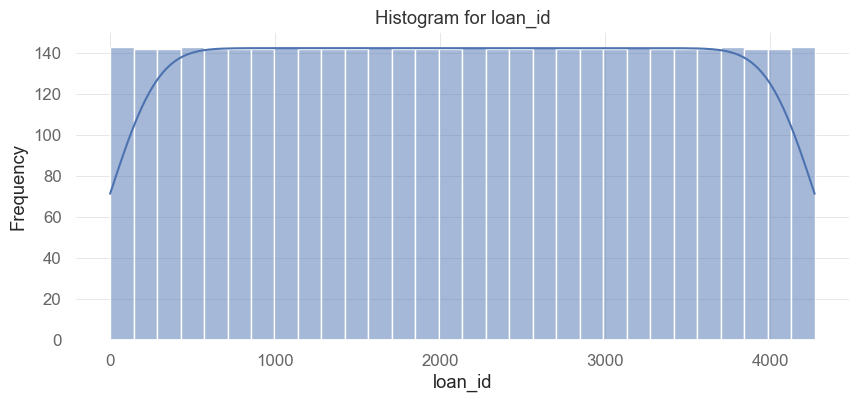

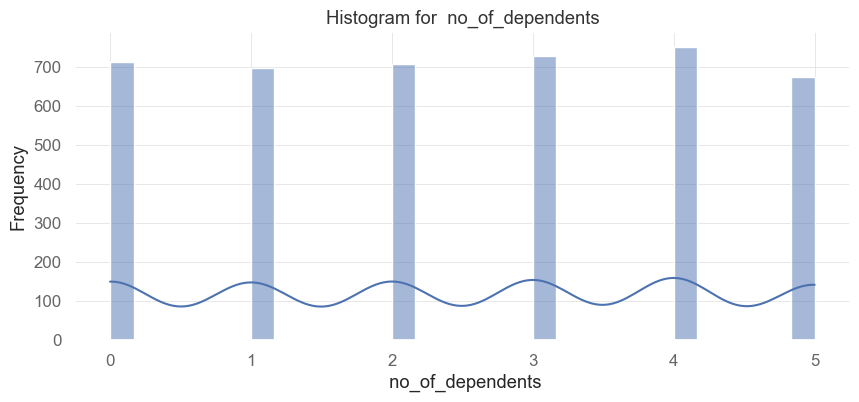

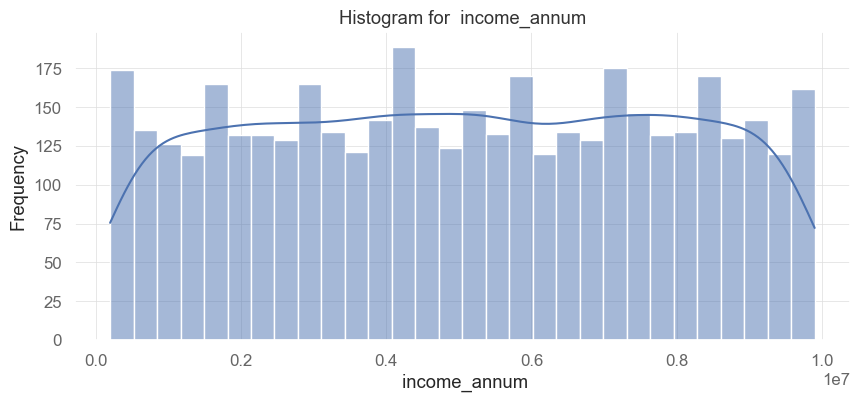

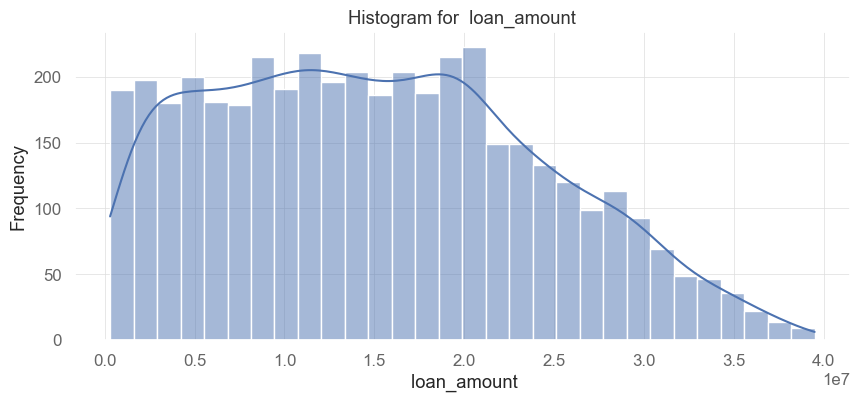

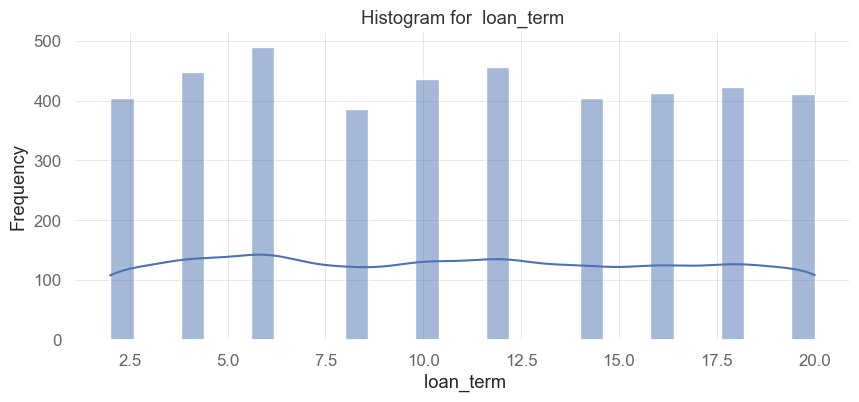

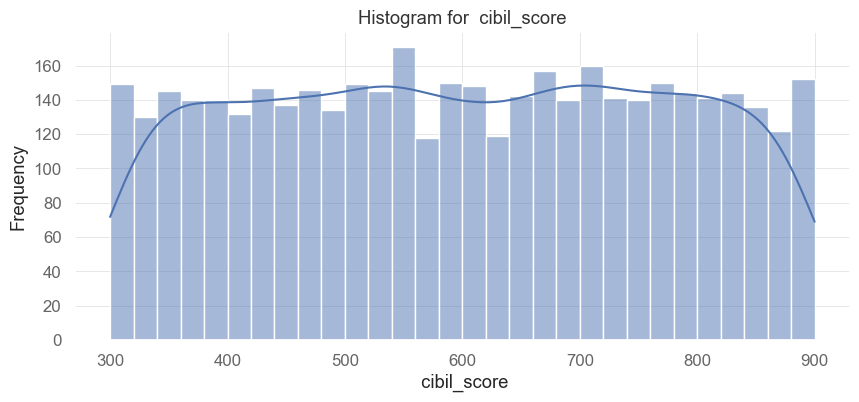

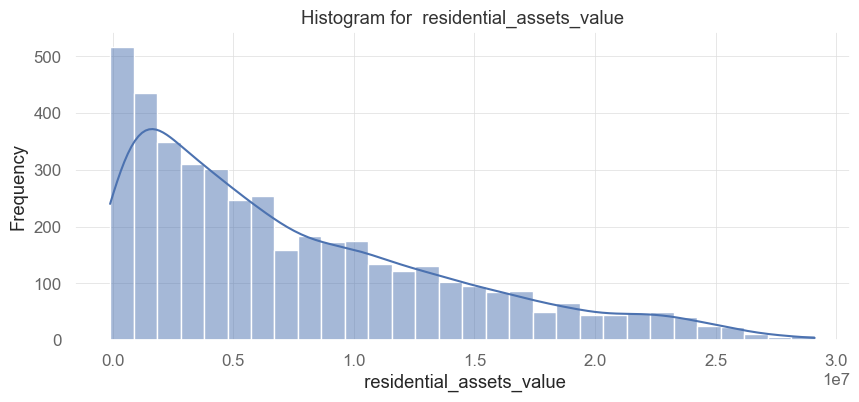

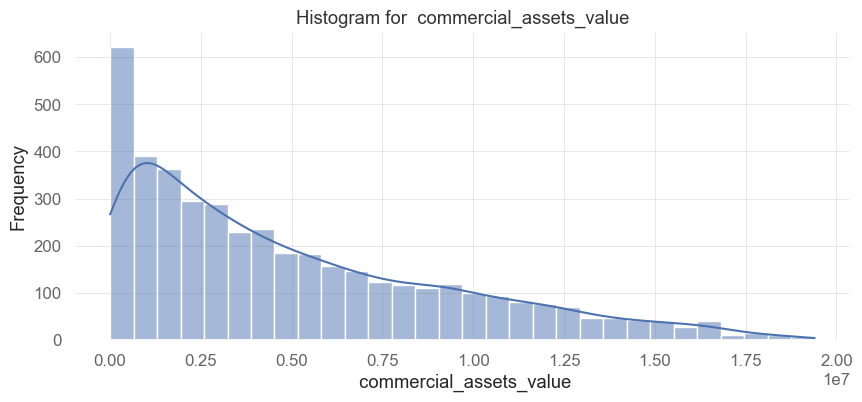

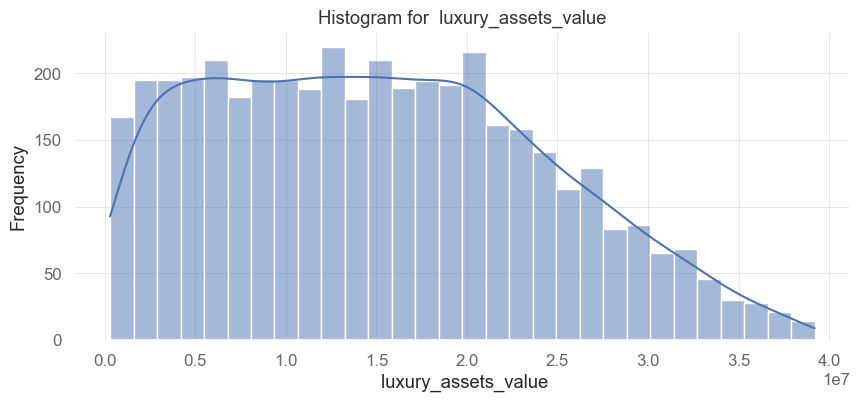

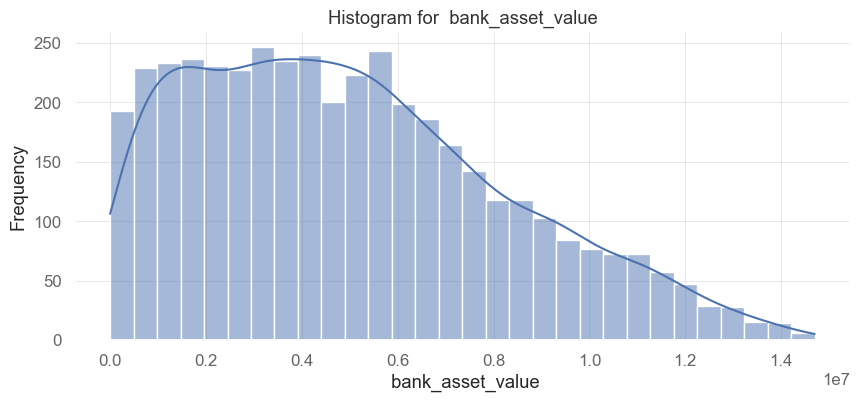


Counts of categorical features:

 education:
 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

 self_employed:
 self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

 loan_status:
 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

Correlation matrix:


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


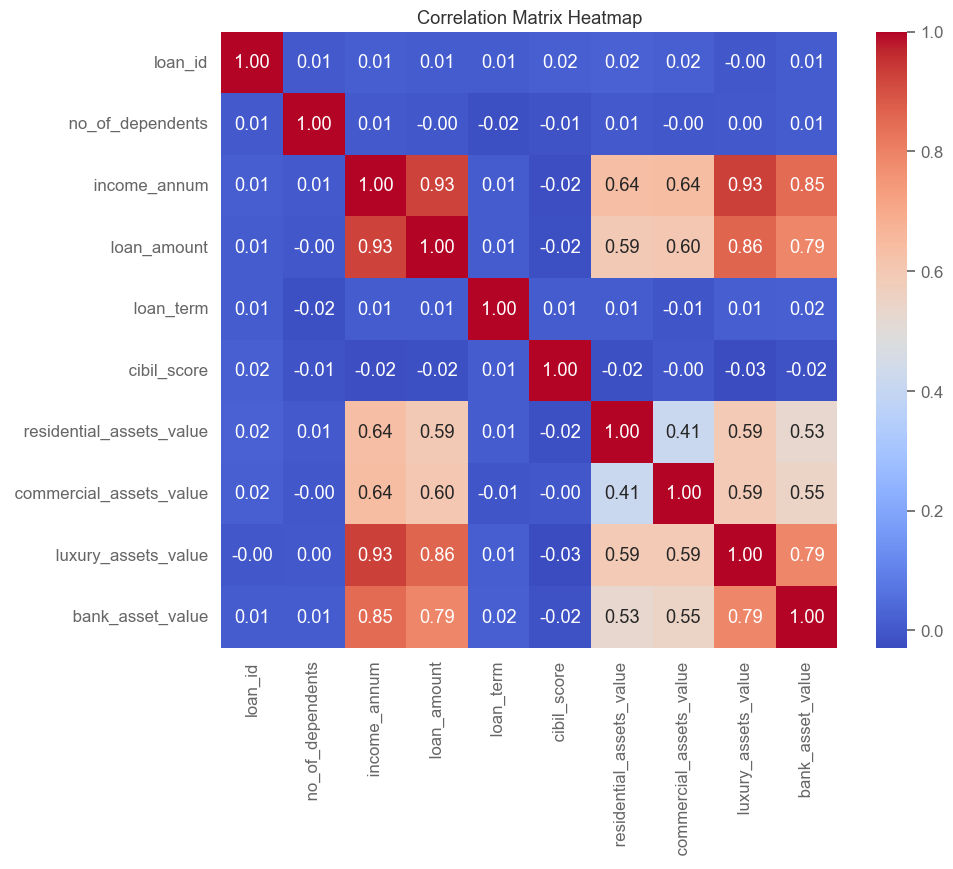


DataFrame Head:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected



DataFrame Tail:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [43]:
df = pd.read_csv('../datasets/loan_approval_dataset.csv') # Loading dataet
dataframe_description_ex(df) # Printing information on the dataset

> <span style="font-size: 20px"><b>📝 We have a total of 13 attributes and 4,269 samples to work with.<br><br>
    📝  There are no missing values in this datasframe.<br><br>
    📝 No duplicates.<br><br>
    📝 We have a bunch of continuous features to check for WoE and IV.</b></span>

In [ ]:
df_copy = df.copy() # Creating a copy of the original dataset
df_copy = df_copy.drop('loan_id', axis = 1) # Removing 'Id' column

In [ ]:
continuous_features = [col for col in df_copy.columns if df_copy[col].dtype in ('int64', 'float64')] # Creating a list of continuous features

# Histogram and Box Plot for each continuous variable
for feat in continuous_features:
    histogram_boxplot(df_copy, feat)

> <span style="font-size: 20px"><b>📝 The histograms suggest that none of these features is normally distributed.<br><br>
    📝  We have some outliers in <code>residential_assets_values</code>, <code>commercial_assets_values</code>, and <code>bank_asset_value</code>. These features are also positively skewed, indicating a larger number of observations with "lower" assets values and a minority of observations owning much higher assets values.<br><br>
    📝  On average, the observations in the dataset have <mark>3 dependents</mark>, which are people who financially depend on the person applying for a loan. <br><br>
    📝  On average, the annual income of all observations is at around <mark>USD 5 million</mark> mark, suggesting a higher-income profile for most of these clients applying for a loan. The loan amount average at the <mark>USD 14 million</mark> mark, with an average loan term of <mark>10 years</mark>, which is the period in which the loan must be repaid.</b><span>

In [ ]:
pie_plot(df_copy, ' loan_status') # Distribution of target variable

> <span style="font-size: 20px"><b>📝 Overall, the majority of observations had their loan application <mark>approved</mark>, with only 37.8% of them being denied due to the risk of <code>default</code>. </b><span>

In [ ]:
plot_correlation(df_copy) # Correlation plot

> <span style="font-size: 20px"><b>📝 The feature correlation plot shows a large amount of high correlations between many features, such as <code>loan_amount</code> and <code>income_annum</code>, for instance. With a Pearson's R correlation of 0.93, this suggests that people with higher annual income may apply for higher loan amounts.</b> <span>

<span style="font-size: 20px"> Due to the high positive correlations, let's plot some scatterplots of the highly-correlated pairs colored by whether they request was approved or rejected. This may help us in identifying the behavior of observations, and patterns that may indicate the profile of clients that were rejected and approved.
</span>

In [ ]:
plot_highly_correlated_pairs(df_copy, ' loan_status') # Scatterplots 

> <span style="font-size: 20px"><b>📝 It's possible to see that the loan amount increases as the annual income, luxury assets value, and the bank assets value also increase. This implies that higher-income clients apply for higher loans. <br><br>
📝 It's also possible to see that the higher the annual income, the higher the overall assets value. <br><br>
📝 Overall, loans saw approval and rejection across different income brackets. Even high-earners and individuals with substantial assets faced denials. However, it seems to exist some sort of spike in rejections among those applicants with lower-income and lower-asset.</b> <span>

In [ ]:
perform_shapiro_wilk_test(df_copy)

> <span style="font-size: 20px"><b>📝 The <mark>Shapiro-Wilk test</mark> confirms the non-normality of distributions.</b><span>

<h1 id = 'woe_and_iv' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Weight of Evidence & Information Value</h1>

<p style="font-size: 20px"> The <b>Weight of Evidence</b> and <b>Information Value</b> are concepts that have been present in <mark><b>Logistic Regression</b></mark> for decades, specially in the credit scoring field. These have been used particularly for allowing easier <mark>interpretability</mark> by identifying the most relevant features that describe an event, specially in the case of credit default. <br><br>
The Weight of Evidence is given by the following formula: <br><br><br></p>

<p style="font-size: 24px">
\[
\text{WoE} = \ln( \frac{\text{Proportion of Good Outcomes}}{\text{Proportion of Bad Outcomes}})
\]
<br><br></p>
<p style="font-size: 20px"> where: <br><br>
• $Proportion$ $of$ $Good$ $Outcomes$ is the % of clients with lower risk of default.<br><br>
• $Proportion$ $of$ $Bad$ $Outcomes$ is the % of clients with higher risk of default.<br><br>
• $ln$ is the natural log.<br><br><br>
The Weight of Evidence is very effective in dealing with <mark>outliers</mark> and <mark>missing values</mark>. It is computed by binning continuous features into groups of smaller bins, in which: <br><br><br>
• Each bin must have at least 5% of samples.<br><br>
• WoE values must be monotonic, either growing or decreasing in value according to the bins.<br><br>
• Missing values must be binned separately.<br><br><br>
For the Information Value, the following formula is used: <br><br><br></p>
<p style="font-size: 18px">
\[\text{IV} = \sum_{i=1}^{n} \left( \text{Proportion of Good Outcomes}_i - \text{Proportion of Bad Outcomes}_i \right) \times \text{WoE}_i
\]
<br><br></p>
<p style="font-size: 20px"> where: <br><br>
• $Proportion$ $of$ $Good$ $Outcomes$ is the % of clients with lower risk of default.<br><br>
• $Proportion$ $of$ $Bad$ $Outcomes$ is the % of clients with higher risk of default.<br><br>
• $\sum$ is the sum of all the subtractions.<br><br><br>
It is essentially the Information Value that will indicate either a feature is useful or not for predicting the target variable, in which: <br><br><br>
• <b>IV</b> lower than 0.02 indicates that the feature is useless for predictions.<br><br>
• <b>IV</b> higher than 0.02 and lower than 0.1 indicates that the feature has weak predictive power.<br><br>
• <b>IV</b> higher than 0.1 and lower than 0.3 indicates that the feature has medium predictive power.<br><br>
• <b>IV</b> higher than 0.3 and lower than 0.5 indicates that the feature has strong predictive power.<br><br>
• <b>IV</b> higher than 0.5 may be suspicious, either too good to be true.<br><br>
</p>

<span style="font-size: 20px"> Let's start our experiment by encoding the target variable <code>loan_status</code>. Since we want to identify those customers that were deemed higher risk for default, let's label <code>Rejected</code> as 1 and <code>Approved</code> as 0. Then, we will split the dataframe into training and testing sets.
</span>

In [ ]:
# Encoding target variable 
df[' loan_status'] = df[' loan_status'].replace({
    ' Approved': 0, # Approved = Good Event = 0
    ' Rejected': 1  # Rejected = Bad Event = 1
})
df # Visualizing results

In [ ]:
train, test = split_train_test(df, 0.3, seed) # Splitting 70% of data for training and 30% for validation

In [ ]:
train = train.drop('loan_id', axis = 1) # Dropping 'ID' column

# Encoding categorical features
train[' education'] = train[' education'].replace({
    ' Not Graduate': 0, ' Graduate': 1
})

train[' self_employed'] = train[' self_employed'].replace({
    ' No': 0, ' Yes': 1
})

In [ ]:
# Selecting columns to bin
columns_to_bin = [' no_of_dependents',' income_annum',' loan_amount', ' loan_term', 
                  ' cibil_score',' residential_assets_value', ' commercial_assets_value',
                  ' luxury_assets_value', ' bank_asset_value']

<span style="font-size: 20px"> Below, we will create the bins for the continuous features. It's important to define <code>bin_edges</code>, so we ensure that the bins will be similar throughout the training and testing sets. 
</span>

In [ ]:
bin_edges_dict = {} # Creating empty dictionaire 

# Splitting samples into different bins and maintaining the edges for reproducibility
for col in columns_to_bin:
    train[col + '_bin'], bin_edges = pd.qcut(train[col], q=20, duplicates='drop', retbins=True)
    bin_edges_dict[col] = bin_edges

In [ ]:
train # Visualizing results

<span style="font-size: 20px"> Even though there are widely used packages for <i>R</i> that can easily compute the Weight of Evidence, the same is not quite true for <i>Python</i>. For this reason, I have used a function that is available on the <a href = "http://www.sanaitics.com/UploadedFiles/html_files/1770WoE_RvsPython.html">Sanaitics</a> website.
</span>

In [ ]:
# Function to compute Weight of Evidence
# Source: http://www.sanaitics.com/UploadedFiles/html_files/1770WoE_RvsPython.html

def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Bin Values': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        }) 
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return dset, iv

In [ ]:
# Dropping original columns. Let's keep only the binned columns
train_bins = train.drop([' no_of_dependents',' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'], axis = 1)

In [ ]:
train_bins # Visualizing results

In [ ]:
# Computing WoEs and IVs

lst = [] # List that will store WoE values for each bin
IV_df = pd.DataFrame(columns=['Variable','IV']) # Dataframe that will store Information Value for each feature
for col in train_bins.columns:
    if col == ' loan_status': continue # Ignore target variable
    else:
        df, iv = calculate_woe_iv(train_bins, col, ' loan_status')
               
    lst.append(df)
    IV_df = IV_df.append({
                "Variable" :col ,
                "IV" : iv,
                },ignore_index=True)

In [ ]:
# Defining threshold values for IVs
def interpret_iv(iv_value):
    if iv_value < 0.02:
        return 'Does not appear to be useful for prediction'
    elif iv_value < 0.1:
        return 'Weak predictive power'
    elif iv_value < 0.3:
        return 'Medium predictive power'
    else:
        return 'Strong predictive power'

In [ ]:
display(IV_df) # Displaying dataframe

# Iterating through samples in the datafrane above and labeling their IVs
for index, row in IV_df.iterrows():
    feature = row['Variable']
    iv_value = row['IV']
    status = interpret_iv(iv_value)
    print(f"{feature}: {status}")

> <span style="font-size: 20px"><b>📝 It appears that the most relevant features for predicting if a loan was accepted or rejected is the <mark>term</mark>, in years, in which the loan is supposed to be repaid, as well as the <mark>credit score</mark> of the applicant. </b><span>

<span style="font-size: 20px"> Below, we can see the WoE values for each bin of each variable.
</span>

In [ ]:
# Printing WoE values for each Bin of each feature
for df, (index, row) in zip(lst, IV_df.iterrows()):
    feature_name = row['Variable']
    if feature_name == ' loan_status':
        continue
    print(f"\nFeature: {feature_name}\n")
    print(df[['Bin Values', 'WoE']])
    print("\n")

<span style="font-size: 20px"> It's important to reinforce that the WoE values must be monotonic, either increasing or decreasing per each bin. We can plot the WoE values for the <code>loan_term_bin</code> to check if the WoE values follow this expected behavior.
</span>

In [ ]:
# Creating a new dataframe containing the WoE label for each Bin
woe_df = pd.DataFrame(columns= ['Bin Values', 'WoE']) 
woe_df['Bin Values'] = ['(1.999, 4.0]', '(12.0, 14.0]', '(16.0, 18.0]', 
                        '(10.0, 12.0]', '(18.0, 20.0]', '(6.0, 8.0]', 
                        '(14.0, 16.0]','(4.0, 6.0]', '(8.0, 10.0]']

woe_df['WoE'] = [-0.915108, -0.010079, 0.071173, 0.134383, 0.167994, 0.185639, 0.242751, 0.288206, 0.348493]
woe_df

In [ ]:
plot_woe(woe_df)

> <span style="font-size: 20px"><b>📝 We can see that indeed, the WoE values increase according to each bin.</b> <span>

<span style="font-size: 20px"> We now must filter our training and testing set, maintaining only the features deemed relevant for predicting <code>loan_status</code>, which in this case are <code>loan_term_bin</code> and <code>cibil_score_bin</code>. <br><br>
We must then replace the bins by their respective Weight of Evidence values, which will be then used for predicting the target variable.
</span>

In [ ]:
train = train[[' loan_term_bin', ' cibil_score_bin', ' loan_status']] # Selecting features for the train dataset
train

In [ ]:
# Creating dictionaire to replace Bin values by the respective WoE value
loan_term_mapping = {
    '(1.999, 4.0]': -0.915108,
    '(12.0, 14.0]': -0.010079,
    '(16.0, 18.0]':  0.071173,
    '(10.0, 12.0]':  0.134383,
    '(18.0, 20.0]':  0.167994,
    '(6.0, 8.0]':  0.185639,
    '(14.0, 16.0]':  0.242751,
    '(4.0, 6.0]':  0.288206,
    '(8.0, 10.0]':  0.348493
}

train[' loan_term_bin'] = train[' loan_term_bin'].astype(str) # Converting 'Category' data type to 'String' 
train[' loan_term_bin'] = train[' loan_term_bin'].replace(loan_term_mapping) # Mapping WoE values to the Bins

In [ ]:
# Creating dictionaire to replace Bin values by the respective WoE value
cibil_score_mapping = {
    '(809.0, 839.0]': -4.476178,
    '(575.15, 605.0]': -4.469489,
    '(692.55, 718.0]': -4.469489,
    '(718.0, 748.25]': -4.462755,
    '(839.0, 869.65]': -4.435356,
    '(779.0, 809.0]': -4.435356,
    '(748.25, 779.0]': -3.809348,
    '(664.0, 692.55]': -3.756002,
    '(545.0, 575.15]': -1.210782,
    '(869.65, 900.0]':  0.000000,
    '(636.0, 664.0]':  0.000000,
    '(605.0, 636.0]':  0.000000,
    '(299.999, 331.0]':  2.200590,
    '(456.0, 485.0]':  2.457553,
    '(331.0, 361.7]':  2.576441,
    '(424.0, 456.0]':  2.667143,
    '(393.0, 424.0]':  2.716756,
    '(485.0, 516.0]':  2.874783,
    '(516.0, 545.0]':  3.071036,
    '(361.7, 393.0]':  3.187699
    }

train[' cibil_score_bin'] = train[' cibil_score_bin'].astype(str) # Converting 'Category' data type to 'String' 
train[' cibil_score_bin'] = train[' cibil_score_bin'].replace(cibil_score_mapping) # Mapping WoE values to the Bins

In [ ]:
train # Visualizing training set with the WoE values 

In [ ]:
columns_to_bin = [' loan_term', ' cibil_score'] # Selecting columns to Bin
for col in columns_to_bin:
    bin_edges = bin_edges_dict[col] 
    test[col + '_bin'] = pd.cut(test[col], bins=bin_edges, include_lowest=True)

test = test[[' loan_term_bin', ' cibil_score_bin', ' loan_status']] # Selecting features for the test dataset
test

In [ ]:
# Mapping WoE values to the test dataset
test[' loan_term_bin'] = test[' loan_term_bin'].astype(str)
test[' cibil_score_bin'] = test[' cibil_score_bin'].astype(str)

test[' loan_term_bin'] = test[' loan_term_bin'].replace(loan_term_mapping)
test[' cibil_score_bin'] = test[' cibil_score_bin'].replace(cibil_score_mapping)
test

<h1 id = 'model' style="border-bottom: 1px solid #ccc;
                        padding-bottom: 10px;
                        margin-bottom: 10px;
                        font-size: 38px;
                        font-weight: bold;
                        color: black;
                        font-family: Poppins">Modeling</h1>

<span style="font-size: 20px"> After identifying the most relevant features and replacing their bin values by their respective WoE values, we are all set to modeling. <br><br>
One of the main goals behind the Weight of Evidence and Information Value, besides all other that were previously mentioned during the development of this notebook, is <mark>model interpretability</mark>. These tools are supposed to give us a straightforward reason why an observation was predicted as either 1 or 0. In the credit scoring industry, explainability is extremely important and that's why it's much preferred - and sometimes even required by regulations - to use <mark><b>White Box Models</b></mark>. <br><br>
For this reason, we are going to use a simple <b>Logistic Regression</b> model with the statsmodels library, allowing for a very straightforward model for predictions. It's also important to reinforce that by replacing our raw data by their Weight of Evidence values, we introduce <mark>linearity</mark> to the data, which is a very important characteristc for Logistic Regression. <br><br>
Let's start by splitting the training and testing sets into $X$ and $y$ variables. 
</span>

In [ ]:
X_train, y_train = X_y_split(train, ' loan_status') # Splitting training dataset

In [ ]:
X_test, y_test = X_y_split(test, ' loan_status') # Splitting testing dataset

In [ ]:
# Creating Logistic Regression Model
model = sm.Logit(y_train,
                 X_train)
result = model.fit() # Fitting model to the training data

# Priting results
print(result.summary())

> <span style="font-size: 20px"><b>📝 With a Pseud R-squared equal to 0.6561, our model explains about 65.61% of the variability of the dependent variable. <br><br>
📝 A Log-Likelihood of -676.85 is better than a null model with a Log-Likelihood of -1968.1. The closer to zero, the better. <br><br>
📝 With a coefficient of 2.7165, higher values for <code>loan_term</code> increases the odds of having the loan request approved. <br><br>
📝 With a coefficient of 1.1309, higher values for <code>cibil_score</code> increases the odds of having the loan request approved.<br><br>
📝 Both the predictors have very lowe standar deviation errors, specially the <code>cibil_score</code>, meaning they are reliable. <br><br>
📝 All the P-Values are below 0.05, which means that our model is overall statistically significant for predicting loan approval or rejection.</b><span>

<span style="font-size: 20px"> Let's now run predictions on the testing set and plot the the results.
</span>

In [ ]:
y_pred = result.predict(X_test) # Running predictions on the testing data
plot_model_performance(result, y_test, y_pred) # Plotting results

<span style="font-size: 20px"> With an AUC score of 0.98, our simple <b>Logistic Regression</b> model with just <b>two predictors</b> is extremelly effective in detecting requests with higher risk of default (<code>1</code>). <br><br>
Thank you so much for reading!</span>

#### <hr style="border: 0; height: 1px; border-top: 0.85px solid #b2b2b2">
<div style="text-align: left; color: #8d8d8d; padding-left: 15px; font-size: 14.25px;">
    Luis Fernando Torres, 2023 <br><br>
    Let's connect!🔗<br>
    <a href="https://www.linkedin.com/in/luuisotorres/">LinkedIn</a> • <a href="https://medium.com/@luuisotorres">Medium</a> • <a href = "https://huggingface.co/luisotorres">Hugging Face</a><br><br>
</div>